# GRIP @ The Sparks Foundation
## Name: Mainak Maity
# Data Science and Business Analytics
## Task 2: Prediction using Unsupervised ML

#### Dataset- https://bit.ly/3kXTdox

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2. Import the dataset

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Check if there is any null values

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 4. Preparing the data

In [4]:
x=df.iloc[:,1:5].values
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## 5. Perform Elbow Method to find optimum number of cluster

C:\Users\MAINAK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


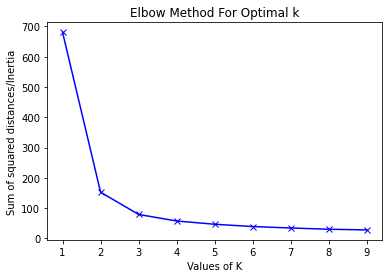

In [5]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

### with the help of elbow method we conclude that the optimum number of cluster is 3
## 6. create k-means clustering with 3 number of clusters

In [6]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans=kmeans.fit_predict(x)
center=kmeans.cluster_centers_

## 7.  Visualising the clusters

### 7.1. Visualising the clusters - On the first two columns(Sepal Length,Sepal Width)

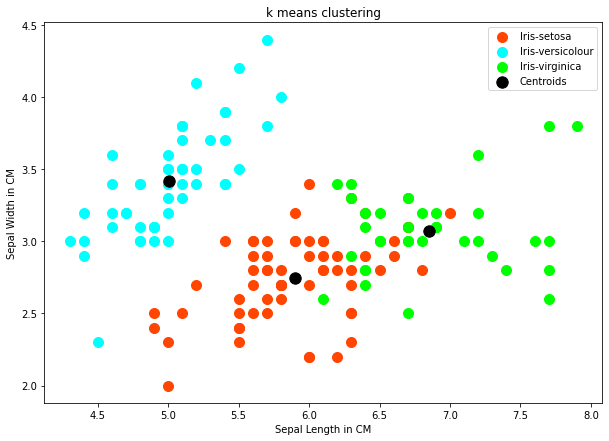

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orangered', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'aqua', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'lime', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 130, c = 'black', label = 'Centroids',marker='o')
plt.xlabel('Sepal Length in CM')
plt.ylabel('Sepal Width in CM')
plt.legend() 
plt.title('k means clustering')
plt.show()


### 7.1. Visualising the clusters - On the third and forth columns(Petal Length,Petal Width)

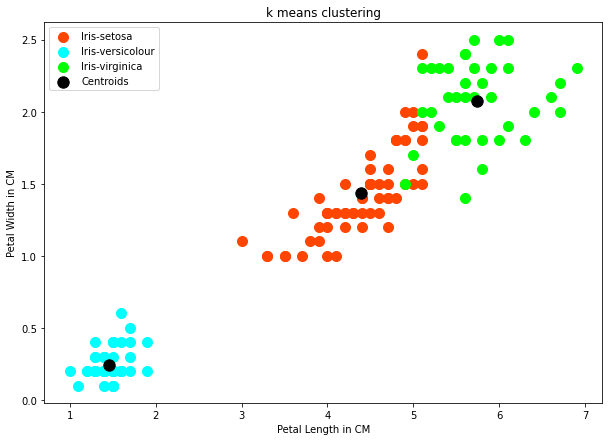

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'orangered', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'aqua', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'lime', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 130, c = 'black', label = 'Centroids',marker='o')
plt.xlabel('Petal Length in CM')
plt.ylabel('Petal Width in CM')
plt.legend() 
plt.title('k means clustering')
plt.show()